In [1]:
import pandas as pd
df=pd.read_csv('cardiotocographic.csv')

In [2]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
df.shape

(2126, 14)

In [4]:
df.ndim

2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


## Missing values

In [6]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [7]:
df.fillna(df.mean(),inplace=True)

In [8]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

## Removing duplicates

In [9]:
df[df.duplicated()]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [10]:
df.drop_duplicates(ignore_index=True,inplace=True)

In [11]:
df.shape[0]

2124

## Checking the datatypes

In [12]:
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

## Removing outliers

In [13]:
num_col=[i for i in df.columns if (df[i].dtypes!='0')]

In [14]:
num_col

['LB',
 'AC',
 'FM',
 'UC',
 'DL',
 'DS',
 'DP',
 'ASTV',
 'MSTV',
 'ALTV',
 'MLTV',
 'Width',
 'Tendency',
 'NSP']

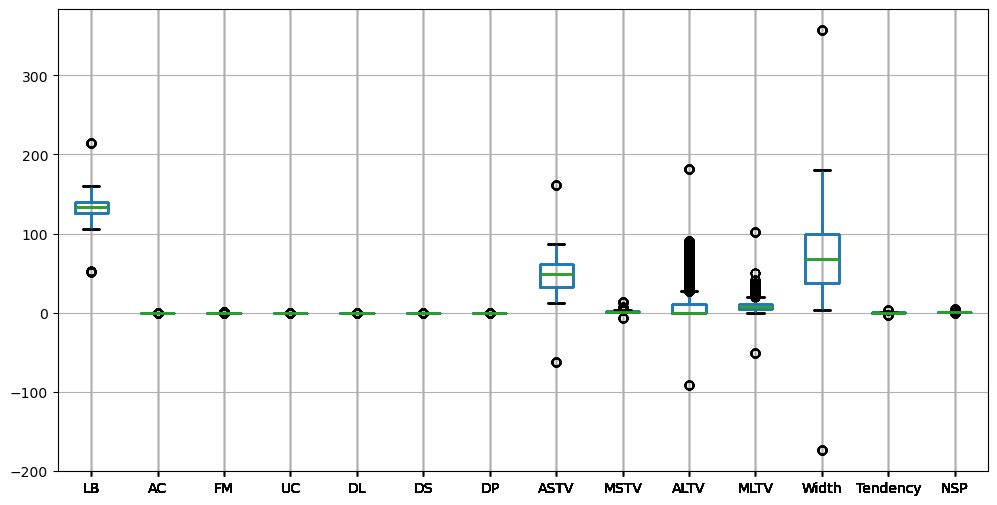

In [15]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,6))
for i in num_col:
    df.boxplot(column=num_col)
plt.show()

In [16]:
Q1=df[num_col].quantile(0.25)

In [17]:
Q2=df[num_col].quantile(0.75)

In [18]:
IQR=Q2-Q1
IQR

LB          14.000000
AC           0.005612
FM           0.002568
UC           0.004678
DL           0.003292
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.200000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64

In [19]:
lower_quant=Q1-(1.5*IQR)
lower_quant

LB          105.000000
AC           -0.008418
FM           -0.003853
UC           -0.005158
DL           -0.004938
DS            0.000000
DP            0.000000
ASTV        -11.500000
MSTV         -0.800000
ALTV        -16.500000
MLTV         -4.700000
Width       -57.500000
Tendency     -1.500000
NSP           1.000000
dtype: float64

In [20]:
upper_quant=Q2+(1.5*IQR)
upper_quant

LB          161.000000
AC            0.014030
FM            0.006421
UC            0.013552
DL            0.008230
DS            0.000000
DP            0.000000
ASTV        104.500000
MSTV          3.200000
ALTV         27.500000
MLTV         20.100000
Width       194.500000
Tendency      2.500000
NSP           1.000000
dtype: float64

In [21]:
df_outliers=df[(df[num_col]<lower_quant) | (df[num_col]>upper_quant)]
df_outliers

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.000000,NaN,NaN,NaN,2.000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,NaN,NaN,0.961268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
2120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.990464
2122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


In [22]:
df_no_outliers=df[(df[num_col]>lower_quant) & (df[num_col]<upper_quant)]
df_no_outliers

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,73.0,0.5,NaN,2.4,64.0,0.999926,NaN
1,132.000000,0.006380,0.000000,0.006380,0.003190,NaN,NaN,17.0,2.1,0.0,10.4,130.0,0.000000,NaN
2,133.000000,0.003322,0.000000,0.008306,0.003322,NaN,NaN,16.0,2.1,0.0,13.4,130.0,0.000000,NaN
3,134.000000,0.002561,0.000000,0.007742,0.002561,NaN,NaN,16.0,2.4,0.0,NaN,117.0,1.000000,NaN
4,131.948232,0.006515,0.000000,0.008143,0.000000,NaN,NaN,16.0,2.4,0.0,19.9,117.0,1.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,140.000000,0.000000,NaN,0.007426,0.000000,NaN,NaN,79.0,0.2,25.0,7.2,40.0,0.000000,NaN
2120,140.000000,0.000775,0.000000,0.006979,0.000000,NaN,NaN,78.0,0.4,22.0,7.1,66.0,1.000000,NaN
2121,140.000000,0.000980,0.000000,0.006863,0.000000,NaN,NaN,79.0,0.4,20.0,6.1,67.0,1.000000,NaN
2122,140.000000,0.000679,0.000000,0.006110,0.000000,NaN,NaN,78.0,0.4,27.0,7.0,66.0,1.000000,NaN


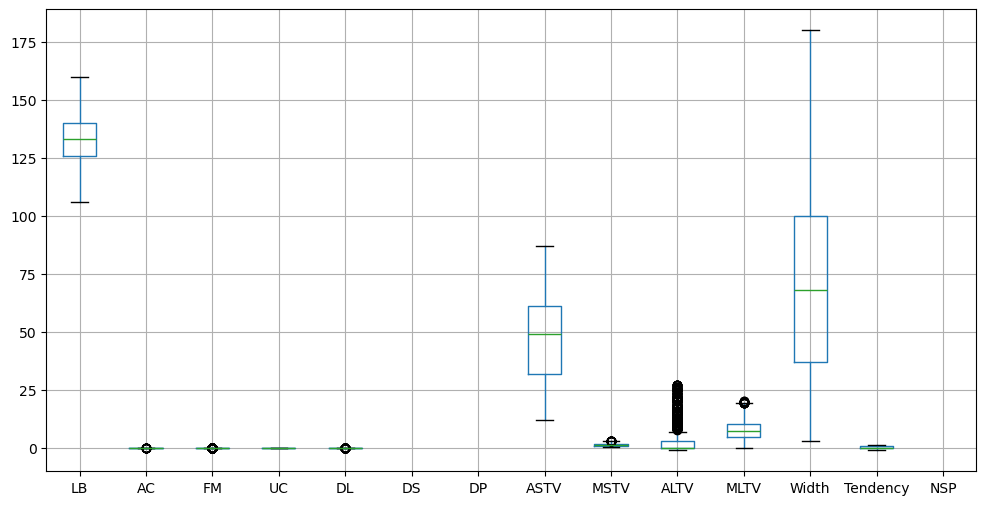

In [23]:
figure=plt.figure(figsize=(12,6))
df_no_outliers.boxplot()
plt.show()

##  Correlation

In [24]:
df[num_col].corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.063451,0.018808,-0.166642,-0.126557,-0.005439,-0.047726,0.241666,-0.169224,0.210672,-0.003225,-0.118375,0.237112,0.132008
AC,-0.063451,1.000000,0.009407,0.071551,-0.093330,-0.033109,-0.083331,-0.231059,0.133903,-0.271203,-0.104655,0.234718,0.031894,-0.312191
FM,0.018808,0.009407,1.000000,-0.053386,0.009641,0.029896,0.121249,-0.032838,0.017061,-0.012005,-0.006157,0.097125,-0.018408,0.073991
UC,-0.166642,0.071551,-0.053386,1.000000,0.189737,-0.006942,0.070348,-0.182379,0.189685,-0.227881,-0.048754,0.106550,-0.066950,-0.185542
DL,-0.126557,-0.093330,0.009641,0.189737,1.000000,0.058429,0.144853,-0.069907,0.410216,-0.187275,-0.164941,0.408426,-0.023759,0.025095
DS,-0.005439,-0.033109,0.029896,-0.006942,0.058429,1.000000,0.004282,0.008414,0.016079,-0.004400,0.034366,0.040831,-0.015408,0.065399
DP,-0.047726,-0.083331,0.121249,0.070348,0.144853,0.004282,1.000000,0.037955,0.119269,-0.077760,-0.113993,0.175240,-0.130510,0.294416
ASTV,0.241666,-0.231059,-0.032838,-0.182379,-0.069907,0.008414,0.037955,1.000000,-0.293820,0.357310,-0.219225,-0.207778,-0.011331,0.421175
MSTV,-0.169224,0.133903,0.017061,0.189685,0.410216,0.016079,0.119269,-0.293820,1.000000,-0.291979,0.028654,0.433230,-0.036653,-0.094635
ALTV,0.210672,-0.271203,-0.012005,-0.227881,-0.187275,-0.004400,-0.077760,0.357310,-0.291979,1.000000,-0.107332,-0.346493,0.036505,0.365219


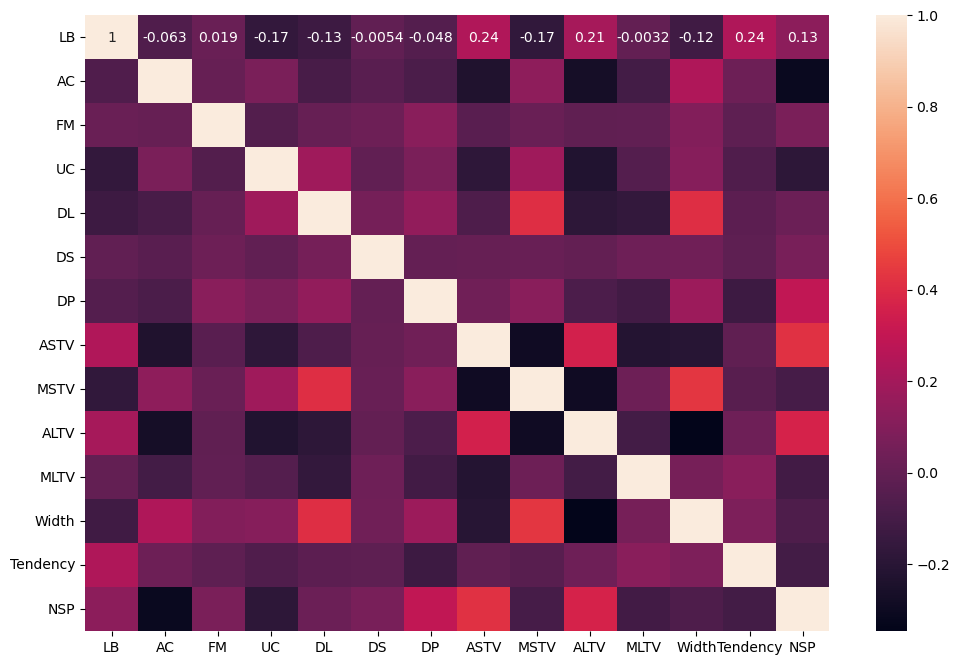

In [25]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
figure=plt.figure(figsize=(12,8))
sns.heatmap(df[num_col].corr(),annot=True)
plt.show()    
    

## Stastical Summary

In [26]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000
mean,133.342039,0.003220,0.009904,0.004394,0.001897,0.000003,0.000175,47.012459,1.364345,10.295650,8.280589,70.460738,0.316669,1.304794
std,11.212396,0.004371,0.067571,0.003340,0.003344,0.000141,0.000836,18.812403,1.174084,21.212676,7.736420,42.726905,0.642653,0.641660
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001858,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004486,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005612,0.002568,0.006536,0.003292,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


## Data Visualization

In [27]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Histogram

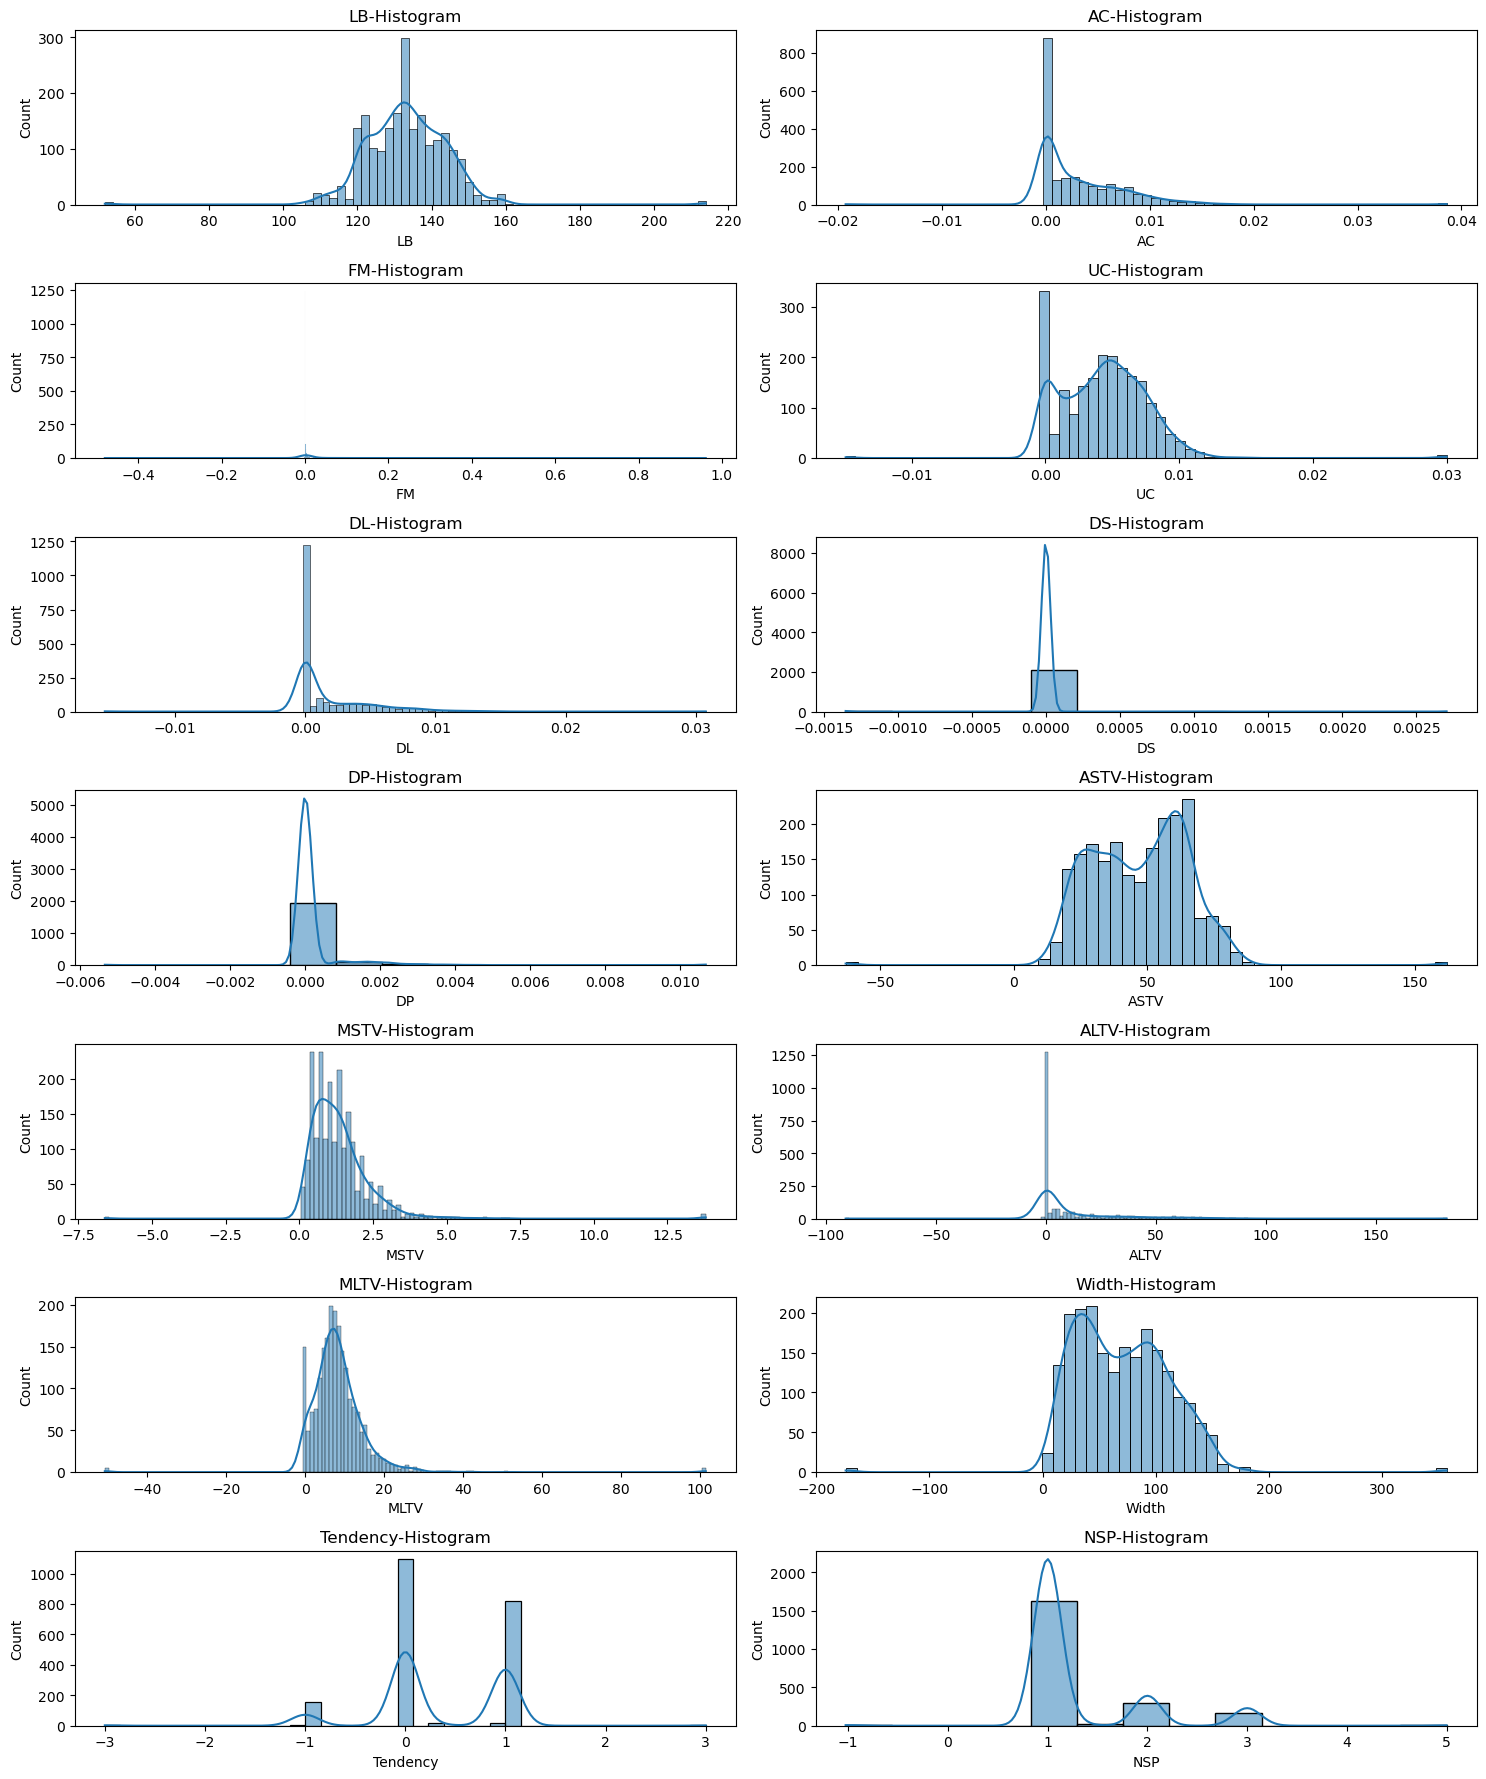

In [28]:
plt.figure(figsize=(15,20))
for i,column in enumerate(df.columns):
    plt.subplot(len(df.columns)//2+1,2,i+1)
    sns.histplot(df[column],kde=True)
    plt.title(f'{column}-Histogram')
plt.tight_layout()    
plt.show()    
    

## Heatmap

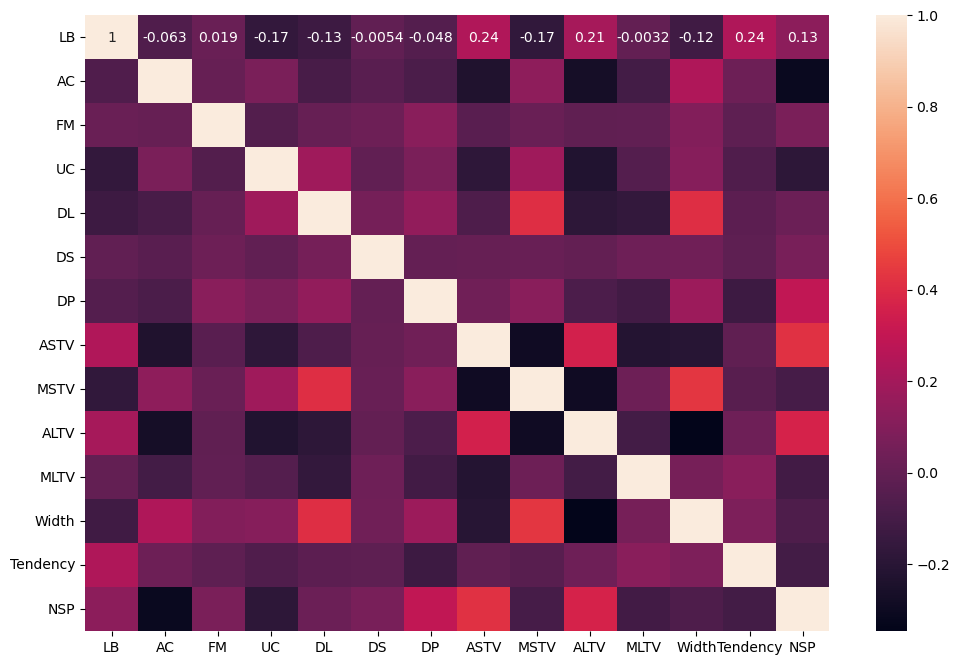

In [29]:
figure=plt.figure(figsize=(12,8))
sns.heatmap(df[num_col].corr(),annot=True)
plt.show()  
